# Objetivo

Aplicar o K Nearest Neighbors Na base toda. 

# Método

A partir do conjunto reduzido de features (39) 100k rows, aplicar:
- fillna <b> OK </b>

- LabelEncoder (ou algo do tipo) <b> 'parcial' </b> - Travou 
- KNN

# Leitura dos arquivos

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Leitura da lista de features a excluir

## Carregamento Clientes
Limitando a 100k por limitação de processamento

## Redução no número de features
Só rodar caso seja necessário filtrar mais vezes

In [ ]:
p1 = pd.read_csv('estaticos_market.csv')
p1.info()

In [ ]:
exclude_df = pd.read_csv('exclude_variables_generated_from_profiling.csv')
exclude_variables = exclude_df.values.squeeze().tolist()
len(exclude_variables)


In [ ]:
p1.columns

In [ ]:
p1.drop(columns=exclude_variables, inplace= True)
p1.drop(columns=['Unnamed: 0'], inplace= True)
p1.shape

In [ ]:
p1.to_csv('estaticos_31_features.csv')

## Carregamento de clientes já filtrados


In [2]:
p1 = pd.read_csv('estaticos_31_features.csv')#,nrows = 200000)

In [3]:
p1.columns

Index(['Unnamed: 0', 'id', 'de_natureza_juridica', 'sg_uf',
       'natureza_juridica_macro', 'de_ramo', 'setor', 'idade_empresa_anos',
       'idade_emp_cat', 'fl_mei', 'dt_situacao', 'fl_email', 'fl_telefone',
       'fl_rm', 'nm_divisao', 'nm_segmento', 'fl_optante_simples',
       'fl_optante_simei', 'sg_uf_matriz', 'de_saude_tributaria',
       'nu_meses_rescencia', 'de_nivel_atividade',
       'empsetorcensitariofaixarendapopulacao', 'nm_meso_regiao',
       'nm_micro_regiao', 'fl_passivel_iss', 'qt_socios', 'idade_media_socios',
       'de_faixa_faturamento_estimado', 'de_faixa_faturamento_estimado_grupo',
       'vl_faturamento_estimado_aux', 'vl_faturamento_estimado_grupo_aux'],
      dtype='object')

In [4]:
p1.drop(columns=['Unnamed: 0'], inplace= True)
p1.set_index('id',inplace=True)
p1.shape

(462298, 30)

# Managing NaNs


Para usar nos dados do portfólio:
- passar as strings para valor numérico
- passar bool para int
- fazer fillna para todos
- - em categoricas -> other
- - em numericas -> 0

Estamos usando o LabelEncoder

In [5]:
fill_dict = p1.dtypes.to_dict()
cat2bool = ['fl_optante_simei','fl_optante_simples','fl_passivel_iss']

for feature in fill_dict:
    if(fill_dict[feature] == bool):
        fill_dict[feature] = False
    elif(fill_dict[feature] == object):
        fill_dict[feature] = 'other'
    else:
        fill_dict[feature] = 0
    if feature in cat2bool:
        fill_dict[feature] = False
        
fill_dict


{'de_natureza_juridica': 'other',
 'sg_uf': 'other',
 'natureza_juridica_macro': 'other',
 'de_ramo': 'other',
 'setor': 'other',
 'idade_empresa_anos': 0,
 'idade_emp_cat': 'other',
 'fl_mei': False,
 'dt_situacao': 'other',
 'fl_email': False,
 'fl_telefone': False,
 'fl_rm': 'other',
 'nm_divisao': 'other',
 'nm_segmento': 'other',
 'fl_optante_simples': False,
 'fl_optante_simei': False,
 'sg_uf_matriz': 'other',
 'de_saude_tributaria': 'other',
 'nu_meses_rescencia': 0,
 'de_nivel_atividade': 'other',
 'empsetorcensitariofaixarendapopulacao': 0,
 'nm_meso_regiao': 'other',
 'nm_micro_regiao': 'other',
 'fl_passivel_iss': False,
 'qt_socios': 0,
 'idade_media_socios': 0,
 'de_faixa_faturamento_estimado': 'other',
 'de_faixa_faturamento_estimado_grupo': 'other',
 'vl_faturamento_estimado_aux': 0,
 'vl_faturamento_estimado_grupo_aux': 0}

In [28]:
p1.fillna(value=fill_dict, inplace=True)
p1[cat2bool] = p1[cat2bool].astype(bool)

bool2numeric = p1.columns[p1.dtypes == bool]
p1[bool2numeric] = p1[bool2numeric].astype(int)

## Encoding

In [29]:
cat = p1.columns[p1.dtypes == object]
cat
not_cat = p1.columns[p1.dtypes != object]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

p1_scaled = encoder.fit_transform(p1)

In [30]:

# Usando LabelEncoder
#https://chrisalbon.com/machine_learning/preprocessing_structured_data/convert_pandas_categorical_column_into_integers_for_scikit-learn/
from sklearn import preprocessing
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()

In [31]:
p1_le = pd.DataFrame()
p1_le[cat] = p1[cat].apply(lambda col: le.fit_transform(col))


In [32]:
p1_encoded = pd.concat([p1[not_cat],p1_le], axis =1)

In [41]:
p1_encoded.dtypes

idade_empresa_anos                       float64
fl_mei                                     int64
fl_email                                   int64
fl_telefone                                int64
fl_optante_simples                         int64
fl_optante_simei                           int64
nu_meses_rescencia                       float64
empsetorcensitariofaixarendapopulacao    float64
fl_passivel_iss                            int64
qt_socios                                float64
idade_media_socios                       float64
vl_faturamento_estimado_aux              float64
vl_faturamento_estimado_grupo_aux        float64
de_natureza_juridica                       int64
sg_uf                                      int64
natureza_juridica_macro                    int64
de_ramo                                    int64
setor                                      int64
idade_emp_cat                              int64
dt_situacao                                int64
fl_rm               

# PCA


Aplicar o PCA para redução de features

In [68]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
stdScaler = MinMaxScaler()

p1_scaled = stdScaler.fit_transform(p1_encoded)

pca = PCA().fit(p1_scaled)
#pca.fit_transform(p1_encoded)

In [69]:
evr = pca.explained_variance_ratio_

evr

array([2.25751735e-01, 1.33521000e-01, 1.03174510e-01, 9.53057180e-02,
       6.65242033e-02, 5.70631093e-02, 4.39452073e-02, 3.82645581e-02,
       3.32607544e-02, 2.80849452e-02, 2.54108387e-02, 2.49192678e-02,
       2.29812303e-02, 1.97481773e-02, 1.78788810e-02, 1.58844283e-02,
       1.00329151e-02, 8.62601094e-03, 7.13846852e-03, 5.23462222e-03,
       5.09575884e-03, 4.36783699e-03, 3.38456687e-03, 1.87473886e-03,
       1.55716349e-03, 5.56552317e-04, 3.26423656e-04, 6.98884238e-05,
       1.50514366e-05, 1.43775329e-06])

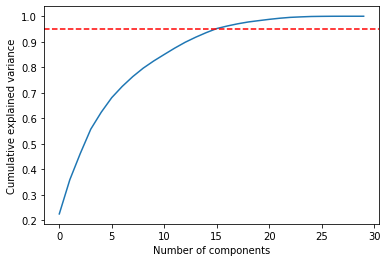

In [70]:
g = sns.lineplot(np.arange(len(evr)), np.cumsum(evr))
g.axes.axhline(0.95, ls="--", color="red")
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

In [ ]:
from sklearn.neighbors import NearestNeighbors

nearest = NearestNeighbors()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test

In [ ]:
from sklearn.Ne import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
p1_label['cluster'] = cluster.fit_predict(p1_label)

## Conclusão até o momento

In [ ]:
- NaNs limpos
- 